# sms-classifier

In [1]:
import pandas as pd
import numpy as np
import warnings


In [2]:
encodings = ['utf-8', 'latin1', 'ISO-8859-1', 'CP1252']

file_path = 'spam.csv'

for encoding in encodings:
    try:
        df = pd.read_csv(file_path, encoding=encoding)
        print(f"File successfully read with encoing: {encoding}")
        break
    except UnicodeDecodeError:
        print(f"Failed to read with encoding: {encoding}")
        continue
        
if 'df' in locals():
    print("CSV file has been successfully loaded.")
else : 
    print("All encoing attempts failed. Unabel to read the CSV file.")

Failed to read with encoding: utf-8
File successfully read with encoing: latin1
CSV file has been successfully loaded.


In [3]:
# import pandas as pd
# df = pd.read_csv('spam.csv', encoding = 'ISO-8859-1')
# df.head()

In [4]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [5]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5470,ham,I thought slide is enough.,NaN,NaN,NaN
2961,ham,"\NONE!NOWHERE IKNO DOESDISCOUNT!SHITINNIT\""""",NaN,NaN,NaN
1575,ham,"Sounds gd... Haha... Can... Wah, u yan jiu so ...",NaN,NaN,NaN
4955,ham,Ahhhh...just woken up!had a bad dream about u ...,NaN,NaN,NaN
1612,spam,RT-KIng Pro Video Club>> Need help? info@ringt...,NaN,NaN,NaN


In [6]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [7]:
df.shape

(5572, 5)

#### 1) Data Cleaning
#### 2) EDA
#### 3) Text Pre-processing
#### 4) Model building
#### 5) Evaluation
#### 6) Improvement
#### 7) Website
#### 8) Deploy

## 1) Data Cleaning

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [9]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [10]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace= True)

In [11]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [12]:
df.rename(columns={'v1':'Target', 'v2':'Text'}, inplace = True)
df.sample(5)

,Target,Text
1440,ham,Cool breeze... Bright sun... Fresh flower... T...
3698,ham,How i noe... Did Ì_ specify da domain as nusst...
2787,ham,"Forgot it takes me 3 years to shower, sorry. W..."
3595,ham,Good morning princess! Happy New Year!
1722,ham,Thought praps you meant another one. Goodo! I'...


In [13]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [14]:
df['Target'] = encoder.fit_transform(df['Target'])

In [15]:
df.head(10)

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
5,1,FreeMsg Hey there darling it's been 3 week's n...
6,0,Even my brother is not like to speak with me. ...
7,0,As per your request 'Melle Melle (Oru Minnamin...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...


In [16]:
df.isnull().sum()

Target    0
Text      0
dtype: int64

In [17]:
# checking duplicate values
df.duplicated().sum()

403

In [18]:
df = df.drop_duplicates(keep='first')

In [19]:
df

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [20]:
df.duplicated().sum()

0

In [21]:
df.shape

(5169, 2)

### EDA
#### Data Exploration

In [22]:
df.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [23]:
df['Target'].value_counts()

0    4516
1     653
Name: Target, dtype: int64

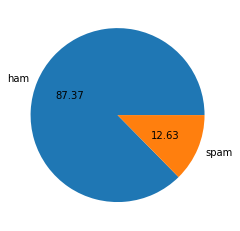

In [24]:
import matplotlib.pyplot as plt
plt.pie(df['Target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [25]:
# Big data of ham and very less spam so out data is not balanced

In [26]:
!pip install nltk

     |████████████████████████████████| 1.5 MB 23.2 MB/s            
     |████████████████████████████████| 773 kB 79.7 MB/s            


In [27]:
import nltk

In [28]:
warnings.filterwarnings("ignore")
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [29]:
df['num_character'] = df['Text'].apply(len) # number of char

In [30]:
df.head()

,Target,Text,num_character
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [31]:
# number of wors
df['num_words'] = df['Text'].apply(lambda x:len(nltk.word_tokenize(x))) # word count

In [32]:
df.head()

,Target,Text,num_character,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [33]:
df['num_sentences']= df['Text'].apply(lambda x:len(nltk.sent_tokenize(x))) # sentence

In [34]:
df.head()

,Target,Text,num_character,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [35]:
df[['num_character','num_words','num_sentences']].describe()

,num_character,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [36]:
# targeting ham
df[df['Target'] == 0][['num_character','num_words','num_sentences']].describe()

,num_character,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [37]:
# targeting spam
df[df['Target'] == 1][['num_character','num_words','num_sentences']].describe()

,num_character,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [38]:
import seaborn as sns

<AxesSubplot:xlabel='num_character', ylabel='Count'>

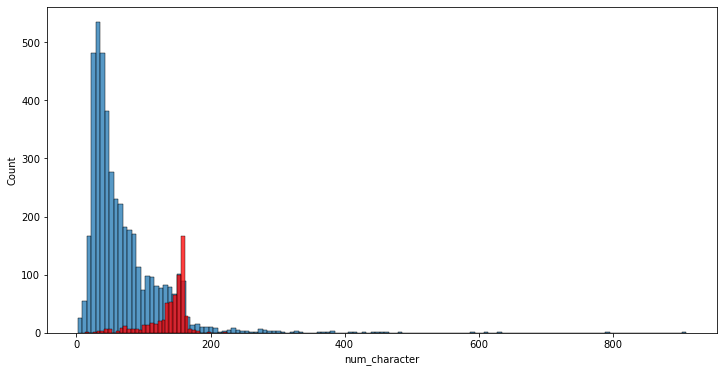

In [39]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Target'] == 0]['num_character'])
sns.histplot(df[df['Target'] == 1]['num_character'],color='red')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

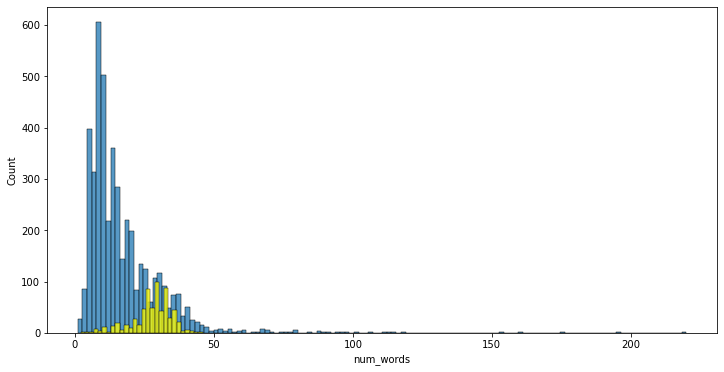

In [40]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Target'] == 0]['num_words'])
sns.histplot(df[df['Target'] == 1]['num_words'], color = 'yellow')

<AxesSubplot:xlabel='num_sentences', ylabel='Count'>

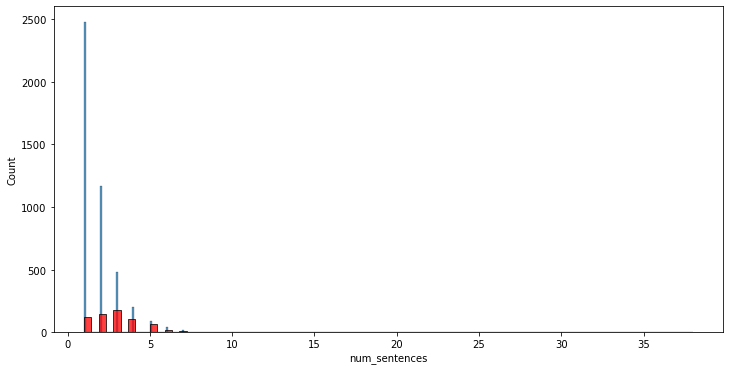

In [41]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Target'] == 0]['num_sentences'])
sns.histplot(df[df['Target'] == 1]['num_sentences'],color = 'red')

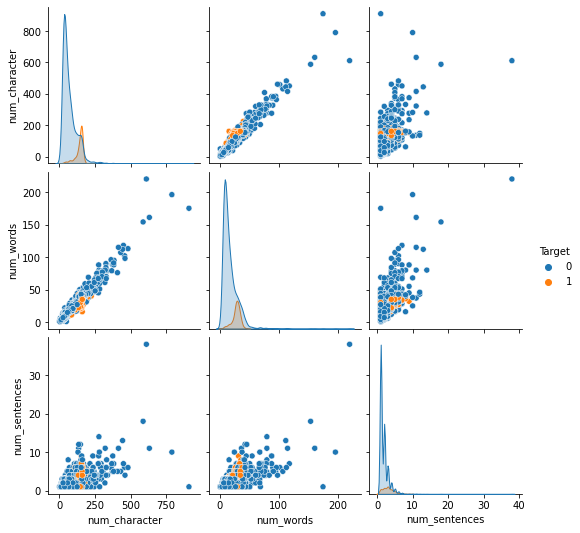

In [42]:
sns.pairplot(df,hue='Target')

<AxesSubplot:>

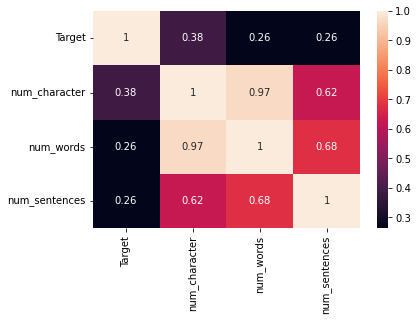

In [43]:
sns.heatmap(df.corr(), annot=True)

### Data Preprocessing

Lower case

Tokenization

Removing special character

Removing stop words and punctuation 

Stemming

In [44]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

nltk.download('stopwords')
ps = PorterStemmer()

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)

transformed_text = transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")
print(transform_text)

<function transform_text at 0x7fa5db3fadc0>


[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [45]:
df['Text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [46]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('going')

'go'

In [47]:
df['transformed_text'] = df['Text'].apply(transform_text)

In [48]:
df.head()

,Target,Text,num_character,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [49]:
!pip install wordcloud

     |████████████████████████████████| 460 kB 25.5 MB/s            


In [50]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500, min_font_size=10,background_color='white')

In [51]:
spam_wc = wc.generate(df[df['Target']==1]['transformed_text'].str.cat(sep=(" ")))

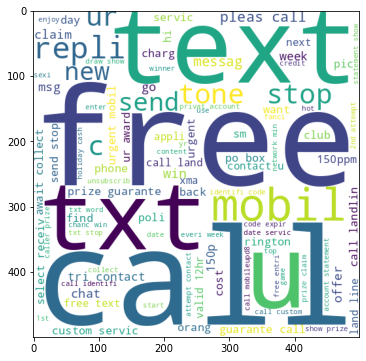

In [52]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [53]:
ham_wc = wc.generate(df[df['Target']==0]['transformed_text'].str.cat(sep = " "))

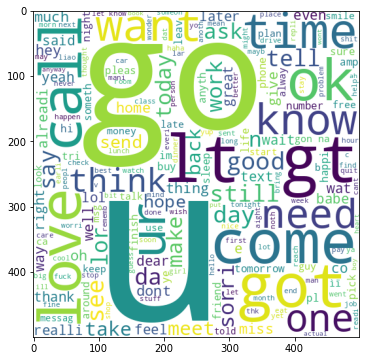

In [54]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [55]:
df.head()

,Target,Text,num_character,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [56]:
# in this we are countig the total words
spam_corpus=[]
for msg in df[df['Target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [57]:
len(spam_corpus)

9939

<function matplotlib.pyplot.show(close=None, block=None)>

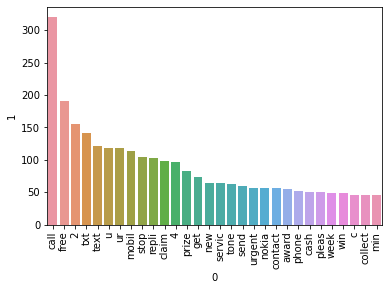

In [58]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0], pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show

In [59]:
ham_corpus=[]
for msg in df[df['Target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [60]:
len(ham_corpus)

35404

<function matplotlib.pyplot.show(close=None, block=None)>

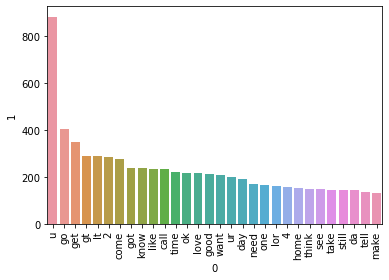

In [61]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show

In [62]:
df.head()

,Target,Text,num_character,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


### Building the model

In [63]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)
    

In [64]:
x = tfidf.fit_transform(df['transformed_text']).toarray()

In [65]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScater()
# X = scaler.fit_transform(x)

In [66]:
# appending the num_character col to X
# X = np.hstack((X,df['num_character'].values.reshape(-1,1)))

In [67]:
x.shape

(5169, 3000)

In [68]:
y = df['Target'].values

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [71]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score

In [72]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [73]:
gnb.fit(x_train,y_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test, y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [74]:
mnb.fit(x_train,y_train)
y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test, y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [75]:
bnb.fit(x_train, y_train)
y_pred3 = bnb.predict(x_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test, y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [76]:
# tfidf --> MNB

In [77]:
!pip install xgboost

     |▊                               | 6.2 MB 24.7 MB/s eta 0:00:12

     |█                               | 9.7 MB 24.7 MB/s eta 0:00:12

     |█▎                              | 12.3 MB 24.7 MB/s eta 0:00:12

     |█▉                              | 17.5 MB 24.7 MB/s eta 0:00:12

     |██▎                             | 21.6 MB 24.7 MB/s eta 0:00:12

     |██▉                             | 26.5 MB 24.7 MB/s eta 0:00:11

     |███▎                            | 30.5 MB 24.7 MB/s eta 0:00:11

     |███▊                            | 35.0 MB 24.7 MB/s eta 0:00:11

     |████▎                           | 39.6 MB 24.7 MB/s eta 0:00:11

     |████▊                           | 44.0 MB 24.7 MB/s eta 0:00:11

     |█████▏                          | 48.3 MB 24.7 MB/s eta 0:00:11

     |█████▉                          | 54.0 MB 24.7 MB/s eta 0:00:10

     |██████▏                         | 57.7 MB 24.7 MB/s eta 0:00:10

     |██████▊                         | 62.0 MB 24.7 MB/s eta 0:00:10

     |███████▏                        | 66.2 MB 24.7 MB/s eta 0:00:10

     |███████▋                        | 70.2 MB 24.7 MB/s eta 0:00:10

     |████████                        | 74.6 MB 24.7 MB/s eta 0:00:09

     |████████▌                       | 78.8 MB 5.5 MB/s eta 0:00:40 

     |█████████                       | 82.6 MB 5.5 MB/s eta 0:00:39 

     |█████████▍                      | 86.8 MB 5.5 MB/s eta 0:00:38 

     |█████████▉                      | 90.9 MB 5.5 MB/s eta 0:00:38 

     |██████████▎                     | 95.5 MB 5.5 MB/s eta 0:00:37 

     |██████████▊                     | 99.4 MB 5.5 MB/s eta 0:00:36 

     |███████████▏                    |

     |███████████▋                    | 107.8 MB 5.5 MB/s eta 0:00:35

     |████████████                    | 112.0 MB 5.5 MB/s eta 0:00:34

     |████████████▌                   | 115.8 MB 5.5 MB/s eta 0:00:33

     |████████████▉                   | 119.4 MB 5.5 MB/s eta 0:00:33

     |█████████████▎                  | 123.4 MB 5.5 MB/s eta 0:00:32

     |█████████████▊                  | 127.2 MB 5.5 MB/s eta 0:00:31

     |██████████████                  | 130.8 MB 5.5 MB/s eta 0:00:31

     |██████████████▌                 | 134.5 MB 5.5 MB/s eta 0:00:30

     |███████████████                 | 138.9 MB 5.5 MB/s eta 0:00:29

     |███████████████▎                | 142.2 MB 5.5 MB/s eta 0:00:28

     |███████████████▊                | 145.8 MB 5.5 MB/s eta 0:00:28

     |████████████████                | 149.5 MB 4.3 MB/s eta 0:00:35

     |████████████████▌               | 152.8 MB 4.3 MB/s eta 0:00:34

     |████████████████▉               | 156.1 MB 4.3 MB/s eta 0:00:33

     |█████████████████▎              | 160.5 MB 4.3 MB/s eta 0:00:32

     |█████████████████▊              | 164.1 MB 4.3 MB/s eta 0:00:31

     |█████████████████▉              | 165.8 MB 4.3 MB/s eta 0:00:31

     |██████████████████▎             | 169.5 MB 4.3 MB/s eta 0:00:30

     |██████████████████▉             | 174.5 MB 4.3 MB/s eta 0:00:29

     |███████████████████▎            | 179.3 MB 4.3 MB/s eta 0:00:28

     |████████████████████            | 185.0 MB 4.3 MB/s eta 0:00:27

     |████████████████████▎           | 188.4 MB 4.3 MB/s eta 0:00:26

     |█████████████████████           | 194.0 MB 4.3 MB/s eta 0:00:25

     |█████████████████████▋          | 200.2 MB 4.3 MB/s eta 0:00:23

     |██████████████████████          | 203.6 MB 4.3 MB/s eta 0:00:22

     |██████████████████████▌         | 209.2 MB 4.3 MB/s eta 0:00:21

     |███████████████████████▏        | 215.2 MB 4.3 MB/s eta 0:00:20

     |███████████████████████▋        | 219.0 MB 4.3 MB/s eta 0:00:19

     |████████████████████████▏       | 224.8 MB 4.3 MB/s eta 0:00:17

     |█████████████████████████       | 232.0 MB 163.2 MB/s eta 0:00:01

     |█████████████████████████▎      | 235.1 MB 163.2 MB/s eta 0:00:01

     |██████████████████████████      | 241.0 MB 163.2 MB/s eta 0:00:01

     |██████████████████████████▏     | 243.3 MB 163.2 MB/s eta 0:00:01

     |██████████████████████████▉     | 248.7 MB 163.2 MB/s eta 0:00:01

     |███████████████████████████     | 250.9 MB 163.2 MB/s eta 0:00:01

     |███████████████████████████▊    | 257.0 MB 163.2 MB/s eta 0:00:01

     |████████████████████████████    | 260.6 MB 163.2 MB/s eta 0:00:01

     |████████████████████████████▍   | 263.2 MB 163.2 MB/s eta 0:00:01

     |████████████████████████████▊   | 267.0 MB 163.2 MB/s eta 0:00:01

     |█████████████████████████████▍  | 272.4 MB 163.2 MB/s eta 0:00:01

     |██████████████████████████████  | 278.4 MB 163.2 MB/s eta 0:00:01

     |██████████████████████████████▎ | 281.2 MB 163.2 MB/s eta 0:00:01

     |███████████████████████████████ | 286.9 MB 163.2 MB/s eta 0:00:01

     |███████████████████████████████▋| 293.6 MB 164.6 MB/s eta 0:00:01

     |████████████████████████████████| 297.1 MB 164.6 MB/s eta 0:00:01

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
# from xgboost import XGBClassifier

In [79]:
svc = SVC(kernel = 'sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=590, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
# xgb = XGBClassifier(n_estimators=50, random_state=2)

In [80]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB' : mnb,
    'DT' : dtc,
    'LR' : lrc,
    'RF' : rfc,
    'AdaBoost' : abc,
    'Bgc' : bc,
    'ETC' : etc,
    'GBDT' : gbdt
}

In [81]:
def train_classifier(clf, x_train, y_train, x_test, y_test):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    
    return accuracy,precision

In [82]:
train_classifier(svc,x_train, y_train, x_test, y_test)

(0.9758220502901354, 0.9747899159663865)

In [83]:
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf, x_train, y_train, x_test, y_test)
    
    print("For ", name)
    print("Accuracy - ", current_accuracy)
    print("Precision - ", current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9294003868471954
Precision -  0.8282828282828283
For  LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
For  RF
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829
For  AdaBoost
Accuracy -  0.9748549323017408
Precision -  0.9444444444444444
For  Bgc
Accuracy -  0.9584139264990329
Precision -  0.8682170542635659
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  GBDT
Accuracy -  0.9468085106382979
Precision -  0.9191919191919192


In [84]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [85]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.975822,0.982906
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
6,AdaBoost,0.974855,0.944444
9,GBDT,0.946809,0.919192
7,Bgc,0.958414,0.868217
3,DT,0.929400,0.828283


In [86]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [87]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.970986
2,RF,Accuracy,0.975822
3,SVC,Accuracy,0.975822
4,ETC,Accuracy,0.974855
5,LR,Accuracy,0.958414
6,AdaBoost,Accuracy,0.974855
7,GBDT,Accuracy,0.946809
8,Bgc,Accuracy,0.958414
9,DT,Accuracy,0.929400


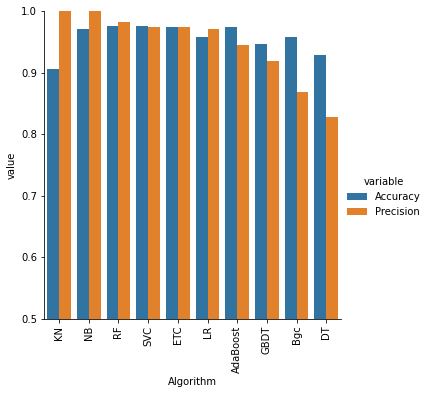

In [88]:
sns.catplot(x='Algorithm', y='value',
                hue = 'variable', data = performance_df1, kind = 'bar', height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [89]:
# model improve
# 1. Change the mix_features parameter of ifidf

In [90]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [91]:
new_df = performance_df.merge(temp_df, on='Algorithm')

In [92]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [93]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=True)

In [94]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000_x,Precision_max_ft_3000_x,Accuracy_max_ft_3000_y,Precision_max_ft_3000_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000
1,NB,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000
2,RF,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906
3,SVC,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790
4,ETC,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576
5,LR,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297
6,AdaBoost,0.974855,0.944444,0.974855,0.944444,0.974855,0.944444,0.974855,0.944444
7,GBDT,0.946809,0.919192,0.946809,0.919192,0.946809,0.919192,0.946809,0.919192
8,Bgc,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217
9,DT,0.929400,0.828283,0.929400,0.828283,0.929400,0.828283,0.929400,0.828283


In [95]:
# Voting classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)

from sklearn.ensemble import VotingClassifier

In [96]:
voting = VotingClassifier(estimators=[('svm',svc),('nb',mnb),('et',etc)],voting='soft')

In [97]:
voting.fit(x_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [98]:
y_pred = voting.predict(x_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9816247582205029
Precision 0.9917355371900827


In [99]:
# Applying stacking
estimators = [('svm',svc),('nb',mnb),('et',etc)]
final_estimator=RandomForestClassifier()

In [100]:
from sklearn.ensemble import StackingClassifier

In [101]:
clf = StackingClassifier(estimators=estimators,final_estimator=final_estimator)

In [102]:
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9816247582205029
Precision 0.9541984732824428


In [103]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [104]:
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

# Sample text data and corresponding labels (replace with your actual data)
x_train = ["Sample text 1","Sample text 2","Sample text 3"]
y_train = [0, 1, 0] # Example label (0 for negative, 1 for positive)

# Create and train the TF-IDF vectorizer
tfidf = TfidfVectorizer(lowercase=True, stop_words='english')
x_train_tfidf = tfidf.fit_transform(x_train)

# Create and train the Naive Bayes classifier
mnb = MultinomialNB()
mnb.fit(x_train_tfidf, y_train)

# Save the trained TF-IDF vectorizer and Naive Bayes model to files
with open('vectorizer.pkl', 'wb') as vectorizer_file:
    pickle.dump(tfidf, vectorizer_file)


with open('model.pkl', 'wb') as model_file:
    pickle.dump(mnb, model_file)
    

In [105]:
import jovian


In [106]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "sauravsevda123/sms-classifier" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/sauravsevda123/sms-classifier


'https://jovian.com/sauravsevda123/sms-classifier'

In [107]:
jovian.commit('vectorizer.pkl')

<IPython.core.display.Javascript object>

[jovian] Updating notebook "sauravsevda123/sms-classifier" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/sauravsevda123/sms-classifier


'https://jovian.com/sauravsevda123/sms-classifier'

In [ ]:
jovian.commit('model.pkl')

<IPython.core.display.Javascript object>